In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Churn_Modelling.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.shape

(10000, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [20]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [22]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [26]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True)

In [28]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [30]:
x = df.drop('Exited', axis=1)
y = df['Exited']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [34]:
x_train.shape

(8000, 11)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [44]:
x_train

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [52]:
model = Sequential()

model.add(Dense(64, input_dim = x_train.shape[1], activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [62]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.7724 - loss: 0.5060 - val_accuracy: 0.8330 - val_loss: 0.3951
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.8435 - loss: 0.3853 - val_accuracy: 0.8535 - val_loss: 0.3580
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - accuracy: 0.8528 - loss: 0.3517 - val_accuracy: 0.8565 - val_loss: 0.3517
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.8553 - loss: 0.3464 - val_accuracy: 0.8550 - val_loss: 0.3408
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - accuracy: 0.8520 - loss: 0.3525 - val_accuracy: 0.8645 - val_loss: 0.3400
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - accuracy: 0.8618 - loss: 0.3348 - val_accuracy: 0.8585 - val_loss: 0.3417
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - accuracy: 0.8604 - loss: 0.3349 - val_accuracy: 0.8580 - val_loss: 0.3361
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - accuracy: 0.8589 - loss: 0

In [69]:
model.layers[2].get_weights()

[array([[ 1.1602088 ],
        [-0.40517288],
        [-0.6606668 ],
        [ 1.3892773 ],
        [-0.8915918 ],
        [-0.5964174 ],
        [-0.9624121 ],
        [-0.6848863 ],
        [ 0.6706467 ],
        [ 0.45857704],
        [ 0.85942763],
        [ 0.4629944 ],
        [ 1.220464  ],
        [ 0.7658271 ],
        [-0.45581686],
        [-1.0196857 ],
        [-0.2949648 ],
        [-0.6086087 ],
        [-1.0948433 ],
        [ 2.193381  ],
        [ 0.863007  ],
        [-0.31045157],
        [ 0.82838017],
        [ 0.31616217],
        [ 0.97877204],
        [ 0.5617701 ],
        [ 0.92741436],
        [ 0.65016156],
        [ 0.6231751 ],
        [-0.5903457 ],
        [-0.30249244],
        [-0.23291966]], dtype=float32),
 array([0.00474081], dtype=float32)]

In [87]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step


In [89]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.848

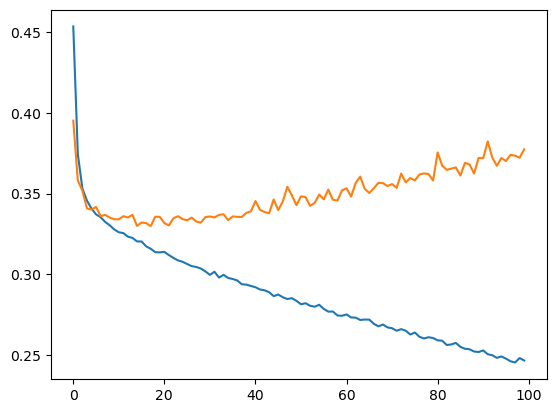

In [93]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

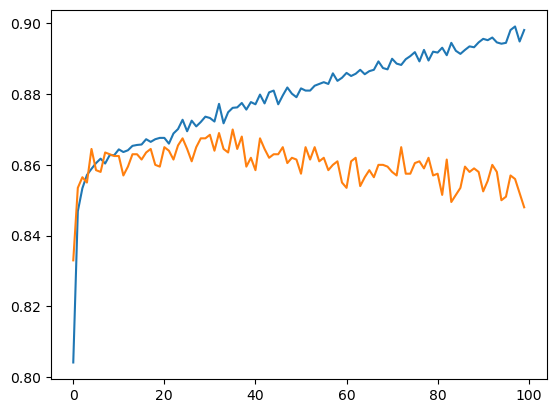

In [95]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1486,   99],
       [ 205,  210]])